# Problem 1: Linear Regression from Scratch (30 points)

In [8]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)


Let's generate some data points first, by the equation $y = x - 3$. 

In [9]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

Let's then visualize the data points we just created. 

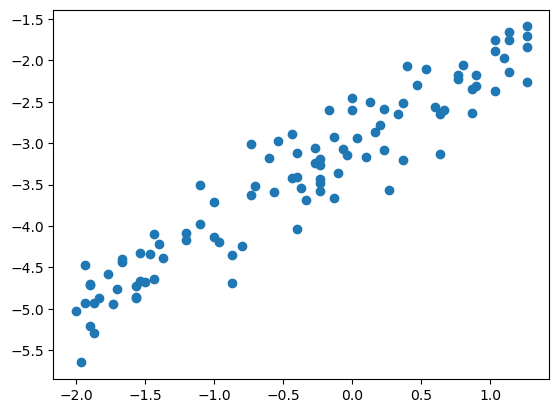

In [10]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model (5 points)

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$ 

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}$$




## 1.2 Gradient of vanilla regularized regression model (5 points)

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}+\frac{\lambda}{m} (\theta_{j})$$

## 1.3 Implement the cost function of a regularized regression model (5 points)

Please implement the cost function of a regularized regression model according to the above equations.

## 1.4 Implement the gradient of the cost function of a regularized regression model (5 points)

Please implement the gradient of the cost function of a regularized regression model according to the above equations.

In [11]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1,)
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        
############################################################################################################## 
####################################### Begin of Question 1.3 ################################################
##############################################################################################################
      
        ##### Please write down your code here:####
        
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = 1/2/m*sum((error)**2)
        
        ##### Please write down your code here:####
        
        # regularization term
        reg_term = sum(lambda_value/m/2*(W**2))
        
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term

        
        
############################################################################################################## 
####################################### End of Question 1.3 ##################################################
##############################################################################################################          
 
    
############################################################################################################## 
####################################### Begin of Question 1.4 ################################################
############################################################################################################## 
        
        ##### Please write down your code here:####
        
        # calculate the gradient of the cost function with regularization term (Equation )
        
        gradient =np.matmul(X.T,error)/m+W*lambda_value/m
 

        # Now we have to update our weights
        W = W - alpha * gradient
        
############################################################################################################## 
####################################### End of Question 1.4 ##################################################
##############################################################################################################          
 
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Run the following code to train your model. 

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

Cost with regularization: 0.05165888565058274
Mean square error: 0.05165888565058274


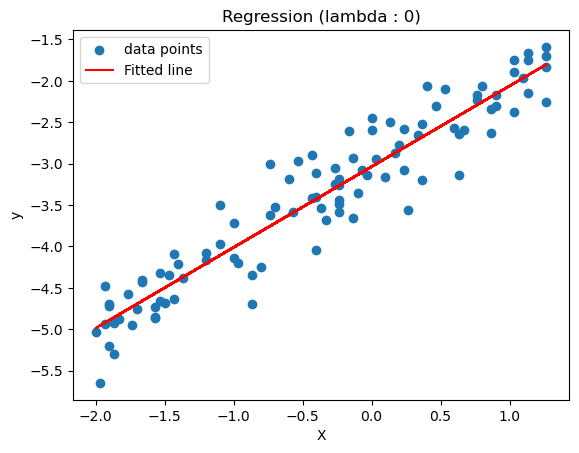

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513123


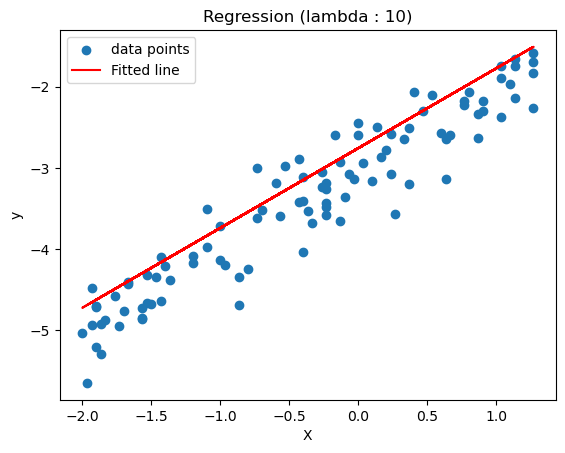

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715974


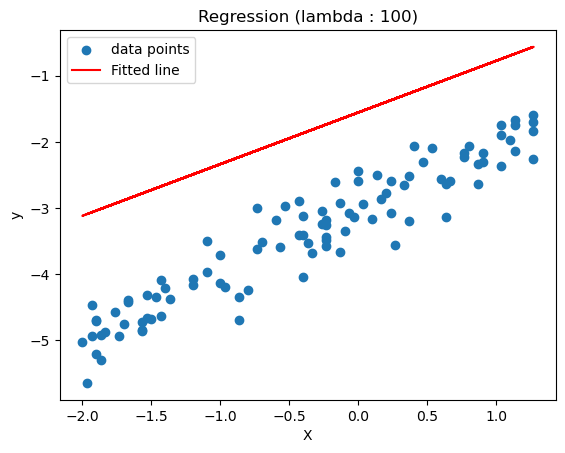

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


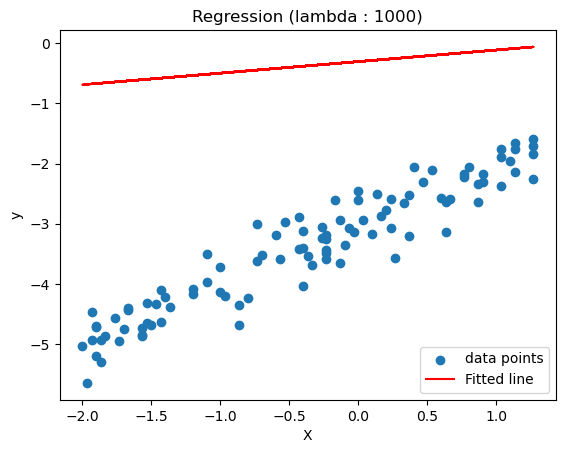

Cost with regularization: 6.242695626933975
Mean square error: 6.161442583355815


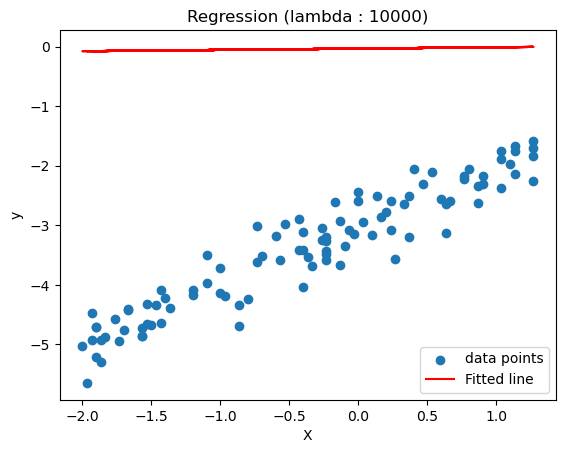

In [12]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results (10 points)


According to the above figures, what's the best choice of $\lambda$? 



Why the regressed line turns to be flat as we increase $\lambda$?

Your answer:  
The best choice of $\lambda$ would be 10, as it's cost with regularization and mean square error are the minimum among these  $\lambda$.  
As we increase $\lambda$ ,the regulation part of cost will increase, so the model will get punished as the value of weights improve, so the weights are getting more and more close to 0, so the regressed line turns to be flat.

# Problem 2: Getting familiar with PyTorch (30 points)

In [13]:
import mltools as ml
import torch

In [14]:
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)

In [15]:
XtrP_tensor = torch.tensor(XtrP)
Ytr_tensor = torch.tensor(Ytr).reshape(-1,1)
XtrP_tensor = XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()

In [16]:
linear_regressor = torch.nn.Linear(in_features=5, out_features=1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1)
epochs = 100000

In [17]:
loss_record =[]
for _ in range(epochs):
    optimizer.zero_grad()
    pred_y = linear_regressor(XtrP_tensor)
    loss = criterion(pred_y,Ytr_tensor)
    loss.backward()
    loss_record.append(loss.item())
    optimizer.step()


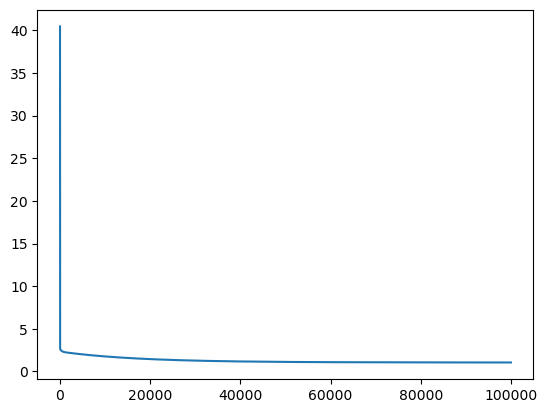

In [18]:
plt.plot(range(epochs), (loss_record))

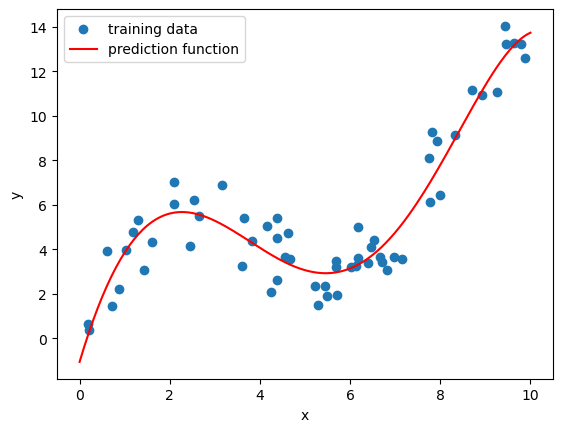

In [19]:
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
#xsP = ml.transforms.fpoly(xs,degree=degree,bias=True)
xsP = ml.transforms.fpoly(xs,degree=degree,bias=False)
xsP, _ = ml.transforms.rescale(xsP, params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)
plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs,ys.detach().numpy(),label="prediction function",color ='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


Statement of Collaboration  
I finished the homework by myself.